In [1]:
import numpy as np
import tensorflow as tf
import twodlearn as tdl
from twodlearn.templates.bayesnet import GpEstimator
import matplotlib.pyplot as plt

In [2]:
train_x = np.concatenate([np.expand_dims(np.linspace(-10, -7, 10, dtype=np.float32), 1),
                        np.expand_dims(np.linspace(7, 10, 10, dtype=np.float32), 1)])
train_y = np.sin(train_x)
test_x = np.expand_dims(np.linspace(-15, 15, 100, dtype=np.float32), 1)

model = GpEstimator(options={'optim/n_logging': 100,
                             'train/optim/learning_rate': 0.001})



In [23]:
model.fit(train_x, train_y, max_iter=500)

100 | [('train/loss', array([-54.24765], dtype=float32))] | [('valid/loss', array([-54.25066], dtype=float32))]
200 | [('train/loss', array([-54.351856], dtype=float32))] | [('valid/loss', array([-54.352173], dtype=float32))]
300 | [('train/loss', array([-54.356255], dtype=float32))] | [('valid/loss', array([-54.355938], dtype=float32))]
400 | [('train/loss', array([-54.363415], dtype=float32))] | [('valid/loss', array([-54.362953], dtype=float32))]
saving weights in tmp/optimizer


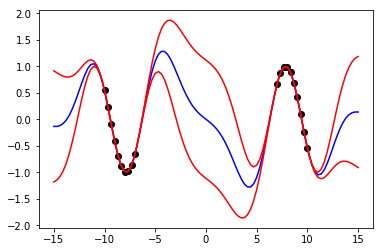

In [24]:
y_pred = model.predict(test_x)

# Plot
fig, ax = plt.subplots(1,1)
ax.plot(train_x, train_y, 'ko')
ax.plot(test_x, y_pred.mean, 'b')
ax.plot(test_x, y_pred.mean + y_pred.stddev, 'r')
ax.plot(test_x, y_pred.mean - y_pred.stddev, 'r')
